In [1]:
import os
import numpy as np

import ROOT
from ROOT import TChain
from larcv import larcv

import torch
import torch.utils.data
import torchvision
from torchvision import datasets, transforms 
from torchvision.utils import save_image

import matplotlib.pyplot as plt
%matplotlib inline

Welcome to JupyROOT 6.16/00


In [2]:
train_path = '/home/plutku01/data/cv/single_particle/source/raw_png/train/'
test_path = '/home/plutku01/data/cv/single_particle/source/raw_png/test/'

train_fname = '/home/plutku01/data/cv/single_particle/source/train_50k.root'
test_fname = '/home/plutku01/data/cv/single_particle/source/test_40k.root'

In [3]:
ROOT.TFile.Open(train_fname).ls()

chain_image2d = ROOT.TChain('image2d_data_tree')
chain_image2d.AddFile('/home/plutku01/data/cv/single_particle/source/train_50k.root')
num_events = chain_image2d.GetEntries()
print(num_events, 'entries found')

(50000L, 'entries found')
TFile**		/home/plutku01/data/cv/single_particle/source/train_50k.root	
 TFile*		/home/plutku01/data/cv/single_particle/source/train_50k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


In [4]:
chain_particle = ROOT.TChain('particle_mctruth_tree')
chain_particle.AddFile('/home/plutku01/data/cv/single_particle/source/train_50k.root')
momentums = []

In [5]:
img_num = 0
for idx in range(num_events):
    chain_image2d.GetEntry(idx)
    chain_particle.GetEntry(idx)
    part_cpp_object = chain_particle.particle_mctruth_branch
    for particle in part_cpp_object.as_vector():
        pdg = int(particle.pdg_code())
        total_energy = particle.energy_init() * 1000.
        momentum = np.sqrt(np.power(total_energy,2) - np.power(larcv.ParticleMass(pdg),2))
        momentums.append(momentum)
    cpp_object = chain_image2d.image2d_data_branch
    image2d_array = cpp_object.as_vector()
#   planes = []
#   for plane in image2d_array:
#       planes.append(torch.sum(torch.from_numpy(larcv.as_ndarray(plane))))
#   img_idx = planes.index(max(planes))
    for plane in image2d_array:
        img = torch.from_numpy(larcv.as_ndarray(plane))
        img_name = train_path + 'larcv_256_{}.png'.format(img_num)
        #torchvision.utils.save_image(img, img_name, normalize=True)
        img_num += 1

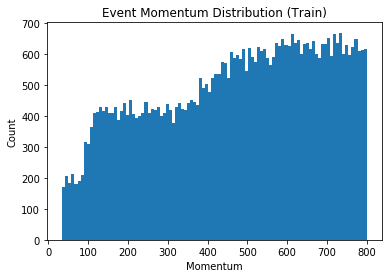

In [6]:
plt.hist(momentums, density=False, bins=100)
plt.title('Event Momentum Distribution (Train)')
plt.ylabel('Count')
plt.xlabel('Momentum');

In [7]:
ROOT.TFile.Open(test_fname).ls()

chain_image2d = ROOT.TChain('image2d_data_tree')
chain_image2d.AddFile('/home/plutku01/data/cv/single_particle/source/test_40k.root')
num_events = chain_image2d.GetEntries()
print(num_events, 'entries found')

(40000L, 'entries found')
TFile**		/home/plutku01/data/cv/single_particle/source/test_40k.root	
 TFile*		/home/plutku01/data/cv/single_particle/source/test_40k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


In [8]:
chain_particle = ROOT.TChain('particle_mctruth_tree')
chain_particle.AddFile('/home/plutku01/data/cv/single_particle/source/test_40k.root')
momentums = []

In [9]:
img_num = 0
for idx in range(num_events):
    chain_image2d.GetEntry(idx)
    chain_particle.GetEntry(idx)
    part_cpp_object = chain_particle.particle_mctruth_branch
    for particle in part_cpp_object.as_vector():
        pdg = int(particle.pdg_code())
        total_energy = particle.energy_init() * 1000.
        momentum = np.sqrt(np.power(total_energy,2) - np.power(larcv.ParticleMass(pdg),2))
        momentums.append(momentum)
    particle = chain_particle.particle_mctruth_branch.as_vector().front()
    cpp_object = chain_image2d.image2d_data_branch
    image2d_array = cpp_object.as_vector()
    for plane in image2d_array:
        img = torch.from_numpy(larcv.as_ndarray(plane))
        img_name = test_path + 'larcv_256_{}.png'.format(img_num)
        #torchvision.utils.save_image(img, img_name, normalize=True)
        img_num += 1

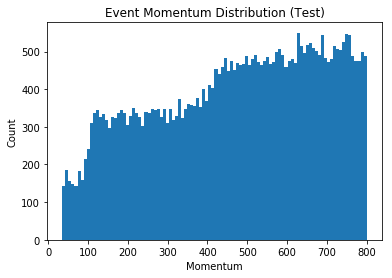

In [10]:
plt.hist(momentums, density=False, bins=100)
plt.title('Event Momentum Distribution (Test)')
plt.ylabel('Count')
plt.xlabel('Momentum');